# Calculating Power Factor
### *Chapter 11 - Power Factor*

As was mentioned before, the angle of this “power triangle” graphically indicates the ratio between the amount of dissipated (or consumed) power and the amount of absorbed/returned power.

It also happens to be the same angle as that of the circuit’s impedance in polar form. When expressed as a fraction, this ratio between true power and apparent power is called the power factor for this circuit.

Because true power and apparent power form the adjacent and hypotenuse sides of a right triangle, respectively, the power factor ratio is also equal to the cosine of that phase angle. Using values from the last example circuit:

$$ \text{Power Factor} = \frac{|P|}{|S|}$$

and,
$$ \frac{|P|}{|S|}=\cos Z_\theta = \cos\!-\theta = \cos\theta$$

Using the values from the resistive/reactive example circuit found in the [previous section](Reactive-True-Apparent-Power.ipynb#Resistive/Reactive-Load) of this chapter:  

$$ \frac{|P|}{|S|} \approxeq \frac{119.37\mathrm{W}}{169.2\mathrm{VA}}\approxeq 0.705$$

It should be noted that power factor, like all ratio measurements, is a unitless quantity.

## Power Factor Values

For the purely resistive circuit, the power factor is 1 (perfect), because the reactive power equals zero. Here, the power triangle would look like a horizontal line, because the opposite (reactive power) side would have zero length.

For the purely inductive circuit, the power factor is zero, because true power equals zero. Here, the power triangle would look like a vertical line, because the adjacent (true power) side would have zero length.

The same could be said for a purely capacitive circuit. If there are no dissipative (resistive) components in the circuit, then the true power must be equal to zero, making any power in the circuit purely reactive.

The power triangle for a purely capacitive circuit would again be a vertical line (pointing down instead of up as it was for the purely inductive circuit).

## Importance of Power Factor

Power factor can be an important aspect to consider in an AC circuit because of any power factor less than 1 means that the circuit’s wiring has to carry more current than what would be necessary with zero reactance in the circuit to deliver the same amount of (true) power to the resistive load.

If our last example circuit had been purely resistive, we would have been able to deliver a full 169.256 watts to the load with the same 1.410 amps of current, rather than the mere 119.365 watts that it is presently dissipating with that same current quantity.

The poor power factor makes for an inefficient power delivery system.

## Poor Power Factor

Poor power factor can be corrected, paradoxically, by adding another load to the circuit drawing an equal and opposite amount of reactive power, to cancel out the effects of the load’s inductive reactance.

Inductive reactance can only be canceled by capacitive reactance, so we have to add a capacitor in parallel to our example circuit as the additional load.

The effect of these two opposing reactances in parallel is to bring the circuit’s total impedance equal to its total resistance (to make the impedance phase angle equal, or at least closer, to zero).

Since we know that the (uncorrected) reactive power is 119.998 VAR (inductive), we need to calculate the correct capacitor size to produce the same quantity of (capacitive) reactive power.

Since this capacitor will be directly in parallel with the source (of known voltage), we’ll use the power formula which starts from voltage and reactance:

\begin{equation}\tag{1}
    Q = \frac{E^2}{X}
\end{equation}

\begin{equation}\tag{2}
    X_\mathrm{C}=\frac{1}{\omega\,C}
\end{equation}    

Solving for the reactance $X$:  Via equation (1),

$$ X = \frac{E^2}{Q} \approxeq \frac{120^2\mathrm{V}^2}{119.99\mathrm{VAR}} \approxeq 120.01\,\Omega$$

In [1]:
120**2/119.99

120.01000083340278

Solving for the capacitance ($C$):  Via equation (2), the above equation, and substitution,   

$$ C = \frac{1}{X_\mathrm{C}\omega}\approxeq \frac{1}{120\pi \cdot 120.01\Omega}\approxeq 22.1\mu\mathrm{F}$$

In [2]:
import numpy as np

In [12]:
def cos(deg: float) -> float:
    return np.cos(np.radians(deg))

def sin(deg: float) -> float:
    return np.sin(np.radians(deg))

In [3]:
1/(120*np.pi*120.01)

2.2103011289600217e-05

Below is a diagram of our circuit with a corrected power factor, using a capacitor with a rounded down capacitance of $22\mu\mathrm{F}$:  

![corrected-power-factor-circuit](https://www.allaboutcircuits.com/uploads/articles/rounded-capacitor-value.png)

Via Ohm's Law, the total current, denoted as '$I$' and '$I_\text{total}$', can be found.  

$$ 120\mathrm{V} = ZI$$

Here, $'Z'$ denotes the total impedance of the circuit, which is given by:  

$$ Z = \frac{1}{D}$$

and,
$$ D = \omega C\angle\,90^\circ + \frac{1}{60\Omega + X_\mathrm{L}j}$$

Recall that the inductive reactance ($X_\mathrm{L}$) is given by:  

$$ X_\mathrm{L} = \omega L = 120\pi \cdot 0.160\mathrm{H}\approxeq 60.32\Omega$$

Thus,  

\begin{align*}
    D &\approxeq  8.33\mathrm{mS}\,\angle\,90^\circ + \frac{1}{85.08}\,\mathrm{S}\,\angle\!-45.15^\circ \\ \\
     &\approxeq 8.29\mathrm{mS} - j\cdot2.81\mu\mathrm{S}
\end{align*}     

In [11]:
w = 120*np.pi
C = 2.21e-5
L = 0.160

In [15]:
D1 = 8.33e-3
D2 = 1/85.08
v = complex(D2*cos(45.15), D1 - D2*sin(45.15))
Z = 1/v
mag = np.sqrt(Z.real**2 + Z.imag**2)
theta = np.degrees(np.arctan(Z.imag/Z.real))
(mag, theta)

(120.63752432597886, 0.01942946397554271)

Thus,  

\begin{align*}
    Z &\approxeq 120.64\Omega + j\cdot40.91\mathrm{m}\Omega \\
     &\approxeq 120.64\Omega\angle\,0.02^\circ
\end{align*}     

The positive impedance phase angle implies the reactance is still mostly inductive.

The current is given by:  

$$ I = I_\text{total}= \frac{120\mathrm{V}}{Z} \approxeq 994.69\mathrm{mA}\,\angle\!-0.02^\circ$$

In [16]:
120/120.64

0.9946949602122016

Via KCL,  

\begin{equation}\tag{3}
    I = I_\mathrm{C} + I_\text{load}
\end{equation}

and, via KVL and Ohm's Law,  

\begin{equation}\tag{4}
    Z_\mathrm{C}I_\mathrm{C} = Z_\text{load}I_\text{load}
\end{equation}    

The total load impedance is given by:  

\begin{align*}
    Z_\text{load} &= 60\Omega + X_\mathrm{L}\angle\,90^\circ \\
     &= 60\Omega + j\cdot X_\mathrm{L} \\
     &\approxeq 85.08\Omega\,\angle\,45.15^\circ
\end{align*}     

In [19]:
X_L = L *w
X_C = 1/(C*w)
load_mag = np.sqrt(60**2 + X_L**2)
load_theta = np.degrees(np.arctan(X_L/60))
C_mag = X_C
C_theta = -90 # degrees

Via equation (4) and (3) in conjunction with substitution, it is possible to solve for $I_\text{load}$.

$$ I = \frac{Z_\text{load}}{Z_\mathrm{C}}\,I_\text{load} + I_\text{load}$$

In [21]:
Z_load = complex(60, X_L)
Z_C = complex(0, -X_C)
Z_load/Z_C + 1

(0.49745553526357167+0.4998902230392078j)

$$ I \approxeq I_\text{load}\,(0.497\Omega + j\cdot 0.5\Omega)$$

In [25]:
I = 120/Z
I_load = I/(Z_load/Z_C + 1)

Thus,  

\begin{align*}
    I_\text{load} &\approxeq (994.58\mathrm{mA} - j\cdot1\mathrm{A}) \\
     &\approxeq 1.41\mathrm{A}\,\angle\!-45.16^\circ
\end{align*}

In [26]:
mag_load = np.sqrt(I_load.real**2 + I_load.imag**2)
theta_load = np.degrees(np.arctan(I_load.imag/I_load.real))
(mag_load, theta_load)

(1.4104795331248934, -45.15929776512758)

Notice how the current flowing through the load has the same value as it did without the power factor correction.  If it didn't have the same value, the reactive and resistive power of the load would not have the same value either, since both are a function of the load current.

Now, for the capacitor (corrector) current:  Via equation (3),  

\begin{align*}
    I_\mathrm{C} &= I - I_\text{load} \\
     &\approxeq (132.45\mu\mathrm{A} + j\cdot 999.79\mathrm{mA}) \\
     &\approxeq 999.79\mathrm{mA}\,\angle\,89.99^\circ
\end{align*}     

In [28]:
I_C = I - I_load
mag = np.sqrt(I_C.real**2 + I_C.imag**2)
theta = np.degrees(np.arctan(I_C.imag/I_C.real))
(mag, theta)

(0.9997914065871183, 89.99240936703771)

Below is a plot of the quantities that we just found.

In [29]:
import matplotlib.pyplot as plt

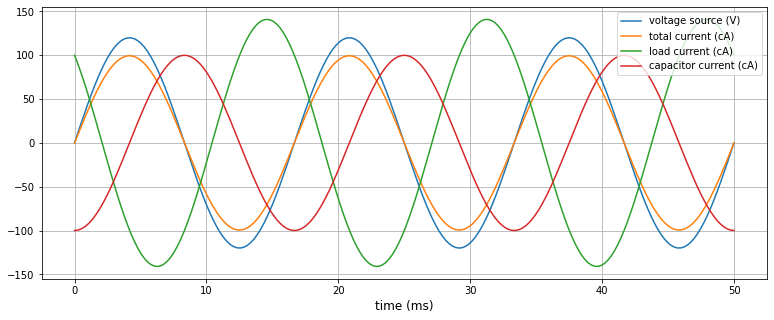

In [31]:
# Cyclic Wave Props.
f = 60
w = 120*np.pi
p = 1/f

# Create time domain over three time periods.
t = np.linspace(0, 3*p, num=200)

# Define the found quantities as a function of time.
E = 120*np.sin(w*t)
I = 0.99469*np.sin(w*t - np.radians(0.02))
I_load = 1.41*np.sin(w*t + np.radians(180-45.16))
I_C = 0.99979*np.sin(w*t + np.radians(-89.99))

# Create figure and axes objects.
fig, ax = plt.subplots(figsize=(13,5))
ax.set_xlabel('time (ms)', size=12)
ax.grid()

# Plot the aforementioned quantities.
ax.plot(t*1000, E, label='voltage source (V)')
ax.plot(t*1000, I*100, label='total current (cA)')
ax.plot(t*1000, I_load*100, label='load current (cA)')
ax.plot(t*1000, I_C*100, label='capacitor current (cA)')
ax.legend()